<center><h1>Simulation of Driven Damped Pendulum</h1></center>

<h2> Introduction </h2>
<p>A simple Pendulum is a model with a point mass hanged from a pivot using a string or rod with negligible mass. It is one of the widely studied physics toys.
    
<img src = "Images/fig1.png" align = 'left'> A simple pendulum is a resonant system with a single resonant frequency. The model assumes frictionless motion and massless rod. The trajectory of the point mass under small perturbations is given by simple harmonic motion around the equilibrium position as shown in the figure. </p>

<p>Under small displacement by angle $\theta $ from the equilibrium position, it is subject to a restoring force due to gravity. This restoring force will accelerate the point mass towards equilibrium position. This results in a periodic motion whose frequency depends only on the length of the rod and the strength of the gravitational force. </p>

<p> Small displacements leads to linear equation of motion which can be solved analytically. Introducing non linear terms leads to non linear equations of motion which requires numerical methods.</p>

<p>In this blog we will try to solve and simulate the motion of a Driven Damped Pendulum. We introduce an external driving force such as motor attached to pivot which will try to drive the point mass away from the equilibrium and air resistance which will tend to do the opposite. The result of both these counteracting factors will result in a trajectory which we shall explore and observe. </p> 

### Importing the required python and custom modules

In [2]:
import vpython as vp
import sys
from math import * 
sys.path.append("/home/Tesla/Programming/Misc/Driven_Pendulum/Modules/")
from RK4CD_module import *
from jupyterthemes import jtplot
jtplot.style()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2> Equation of motion of a driven damped pendulum </h2>
<p><img src = "Images/fig2.gif" align = "right" />
<br>Using Newton's law of motion, we arrive at<br>
$$ml\ddot \varphi + \gamma l\dot \varphi + mgsin\varphi = Acos(\omega_Dt)$$
where, $A$ = Amplitude of Oscillation, $\gamma$ = damping coefficient, $l$ = length of the rod and $\omega_D$ = frequency of the driving force
</p>
<p>
The above equation is a non-linear second order differential equation. Unfortunately, there exists no analytical solution. We will attack this numerically and will employ a powerful technique Runge-Kutta algorithm. In order to use Runge-Kutta algorithm, we transform Eq (1) to a set of first order equations. The set of equations under the substitution $\omega = \dot \varphi$ are,
    $$\dot \omega = Acos(\omega_Dt)/ml - \gamma \omega/m - gsin\varphi/l$$$$\omega = \dot \varphi$$
</p>

In [3]:
time = 0.0; Amplitude = 3.0; t_max = 50.0 
gravity = 9.81; damping = 0.16; lor = 1.2
w0 = sqrt(gravity/lor); mass = 0.5

my_bob = vp.sphere(pos = vp.vector(lor*sin(pi/2),0,0), radius = lor*0.1, color = vp.vector(1,1,1), make_trail = True)
my_rod = vp.cylinder(pos = vp.vector(0,0,0), axis = my_bob.pos, radius = my_bob.radius*0.1, color = vp.vector(0.4,0.8,0.9))

In [4]:
def force_driving(x):
    return Amplitude*(cos(w0*x))/(mass*lor)

def f1(x,y,z):
    return z

def f2(x,y,z):
    return (-damping*z)/mass - (gravity*sin(y))/lor + force_driving(x)

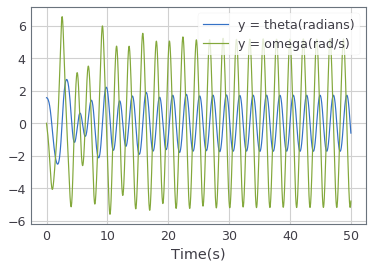

In [5]:
vw,vtheta,vt = ODE_runge_4th_CD(f1,f2,pi/2,0,0,t_max)

plot(vt,vtheta)
plot(vt,vw)
legend(['y = theta(radians)','y = omega(rad/s)'], loc = 'upper right')
xlabel('Time(s)')
show()

In [6]:
scene = vp.canvas()
for theta in vtheta:
    vp.rate(50)
    my_bob.pos = vp.vector(lor*sin(theta),-lor*cos(theta),0)
    my_rod.axis = my_bob.pos

<IPython.core.display.Javascript object>